# New York City Taxi Trip Duration 01 - EDA

### ※ 프로젝트 개요
####   
####   
### ● 뉴욕시 의 택시 주행 시간을 예측하는 모델 만들기
### ● 픽업 시간, 지리적 좌표, 승객 수 등의 변수가 포함된 NYC 택시 리무진 위원회에서 만든 데이터를 가공해서 사용

###   
### 목표 : 데이터에 대한 EDA(탐색적 데이터 분석)을 수행
###   
###   

## 1. 데이터 불러오기

In [1]:
import pandas as pd

#### train 데이터

In [2]:
train = pd.read_csv("train.csv", parse_dates = ['pickup_datetime', 'dropoff_datetime'])
print(train.shape)
train.head()

(1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


#### test 데이터

In [3]:
test = pd.read_csv("test.csv", parse_dates = ['pickup_datetime'])
print(test.shape)
test.head()

(625134, 9)


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


#### 제출양식

In [4]:
predictions = pd.read_csv("sample_submission.csv")
print(predictions.shape)
predictions.head()

(625134, 2)


,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959


####   
####   

## 2. 데이터 탐색

### 1) 변수 확인

In [5]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [6]:
test.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')

#### id - 각 운행의 고유 식별자
#### vendor_id - 여행 기록과 연결된 공급자를 나타내는 코드
#### pickup_datetime - 미터기가 사용 된 날짜와 시간
#### dropoff_datetime - 미터가 분리 된 날짜와 시간
#### passenger_count - 차량에 탑승 한 승객 수 (운전자가 입력 한 값)
#### pickup_longitude - 미터가 사용 된 경도
#### pickup_latitude - 미터가 사용 된 위도
#### dropoff_longitude - 미터가 분리 된 경도
#### dropoff_latitude - 미터가 분리 된 위도
#### store_and_fwd_flag -이 플래그는 자동차가 서버에 연결되어 있지 않아서 출장 기록이 차량 메모리에 보관되었는지 여부를 나타냅니다. - Y = 저장 및 전달; N = 상점 및 전방 여행 불가
#### trip_duration - 여행 기간 (초)

#### 목표는 id별 'trip_duration'
#### ※ test데이터에는 'dropoff_datetime'이 존재하지 않음. 이유는 "dropoff_datetime"이 있으면  'trip_duration'을 구할 수 있기 때문

### 2) factor형 변수 확인

In [7]:
pd.unique(train['vendor_id'])

array([2, 1], dtype=int64)

#### 'vendor_id'는 단 두 가지만 존재한다. 뉴욕시의 택시가 'Green Cabs'과 'Yellow Cabs' 두 가지가 있는 데 이에 대한 정보 같다.  factor형 변수이다. 

In [8]:
pd.unique(train['passenger_count'])

array([1, 6, 4, 2, 3, 5, 0, 7, 9, 8], dtype=int64)

#### 승객수를 '0~9'명으로 표시하고 있다. 보통 택시가 승용차라서 5명 이상 승객은 잘못된 데이터일 수도 있다. 물론 벤 형태의 택시가 있을 수 있다.  factor형 변수

In [9]:
pd.unique(train['pickup_longitude'])

array([-73.98215485, -73.98041534, -73.97902679, ..., -73.84746552,
       -73.89477539, -73.84131622])

In [10]:
pd.unique(train['dropoff_latitude'])

array([40.76560211, 40.73115158, 40.71008682, ..., 40.65151978,
       40.64244461, 40.62860489])

#### 위도(latitude) 경도(longitude)는 당연히 factor형 변수가 아니다.

In [11]:
pd.unique(train['store_and_fwd_flag'])

array(['N', 'Y'], dtype=object)

#### 출장기록 여부는 'Yes'와 'NO'인 factor형 변수이다

### 3) 빈도수 확인

In [28]:
train['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [29]:
train['pickup_datetime'].value_counts()

2016-03-04 08:07:34    5
2016-01-12 18:48:44    5
2016-04-05 18:55:21    5
2016-06-10 23:17:17    5
2016-05-07 13:18:07    5
2016-02-09 21:03:38    5
2016-03-14 07:45:58    4
2016-03-13 12:05:04    4
2016-04-08 16:42:13    4
2016-06-09 22:01:37    4
2016-02-24 12:04:44    4
2016-03-21 22:01:10    4
2016-06-15 22:28:10    4
2016-02-05 17:32:08    4
2016-03-31 10:42:34    4
2016-01-12 14:17:27    4
2016-03-06 00:08:14    4
2016-04-04 09:36:50    4
2016-06-07 21:04:32    4
2016-03-14 17:19:59    4
2016-02-20 20:56:20    4
2016-04-01 23:28:13    4
2016-06-09 19:59:43    4
2016-01-13 19:59:16    4
2016-06-21 17:40:51    4
2016-03-26 14:20:33    4
2016-01-06 21:43:57    4
2016-02-24 20:22:47    4
2016-02-24 12:04:42    4
2016-03-19 22:28:48    4
                      ..
2016-02-13 13:49:46    1
2016-03-29 08:04:34    1
2016-03-13 03:11:57    1
2016-06-20 07:02:01    1
2016-04-23 17:18:56    1
2016-06-11 19:01:08    1
2016-04-21 17:30:28    1
2016-05-17 05:45:14    1
2016-01-07 01:29:43    1


In [32]:
train['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [34]:
train['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [27]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'store_and_fwd_flag_Y', 'store_and_fwd_flag_N',
       'vendor_1', 'vendor_2', 'passenger_0', 'passenger_1', 'passenger_2',
       'passenger_3', 'passenger_4', 'passenger_5', 'passenger_6',
       'passenger_7', 'passenger_8', 'passenger_9'],
      dtype='object')

### 4) 결측치 확인

In [12]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [13]:
test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

#### 결측치는 보이지 않는다. 이를 missingno 패키지를 활용하여 시각화하여 다시 살펴본다.

In [14]:
import missingno as msno

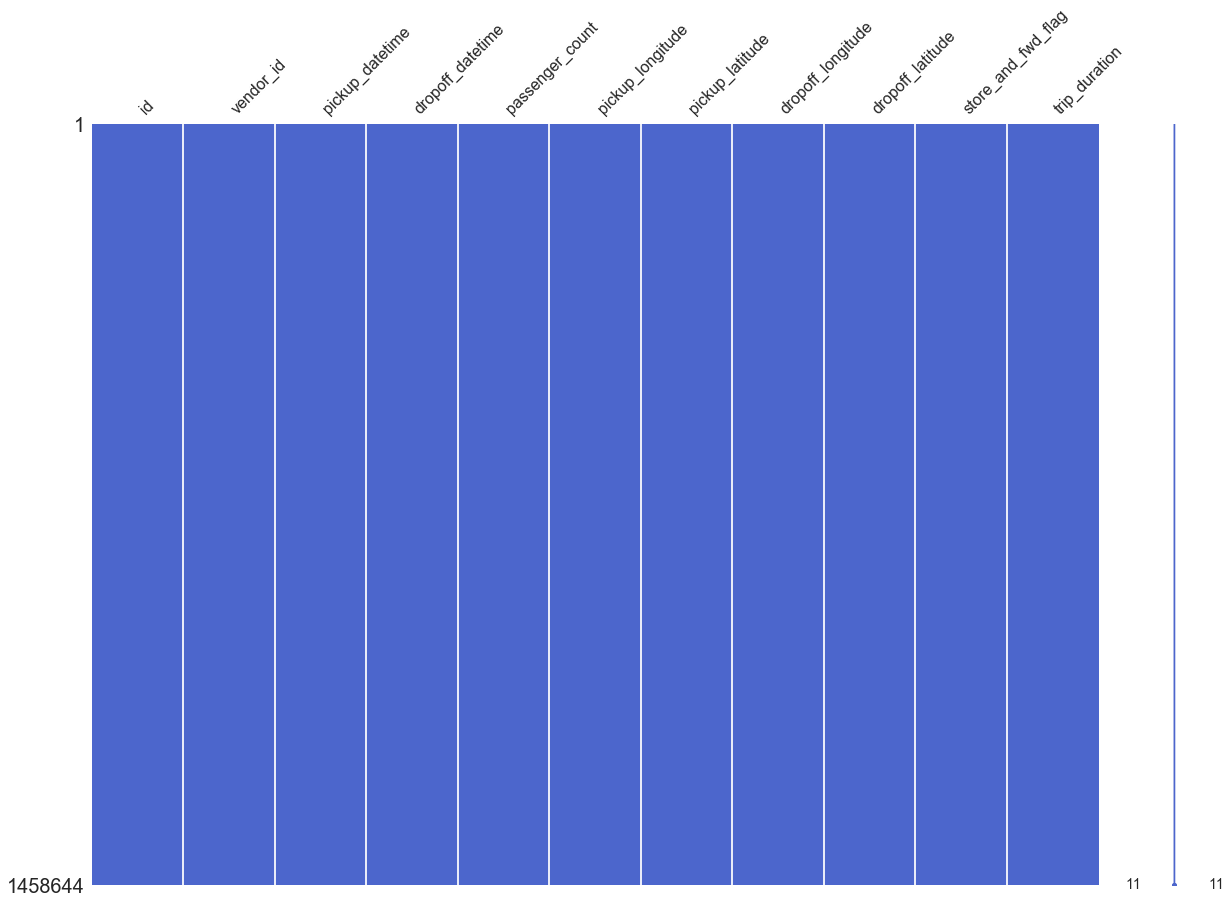

In [15]:
msno.matrix(df = train, figsize = (20, 14), color = (0.3, 0.4, 0.8))

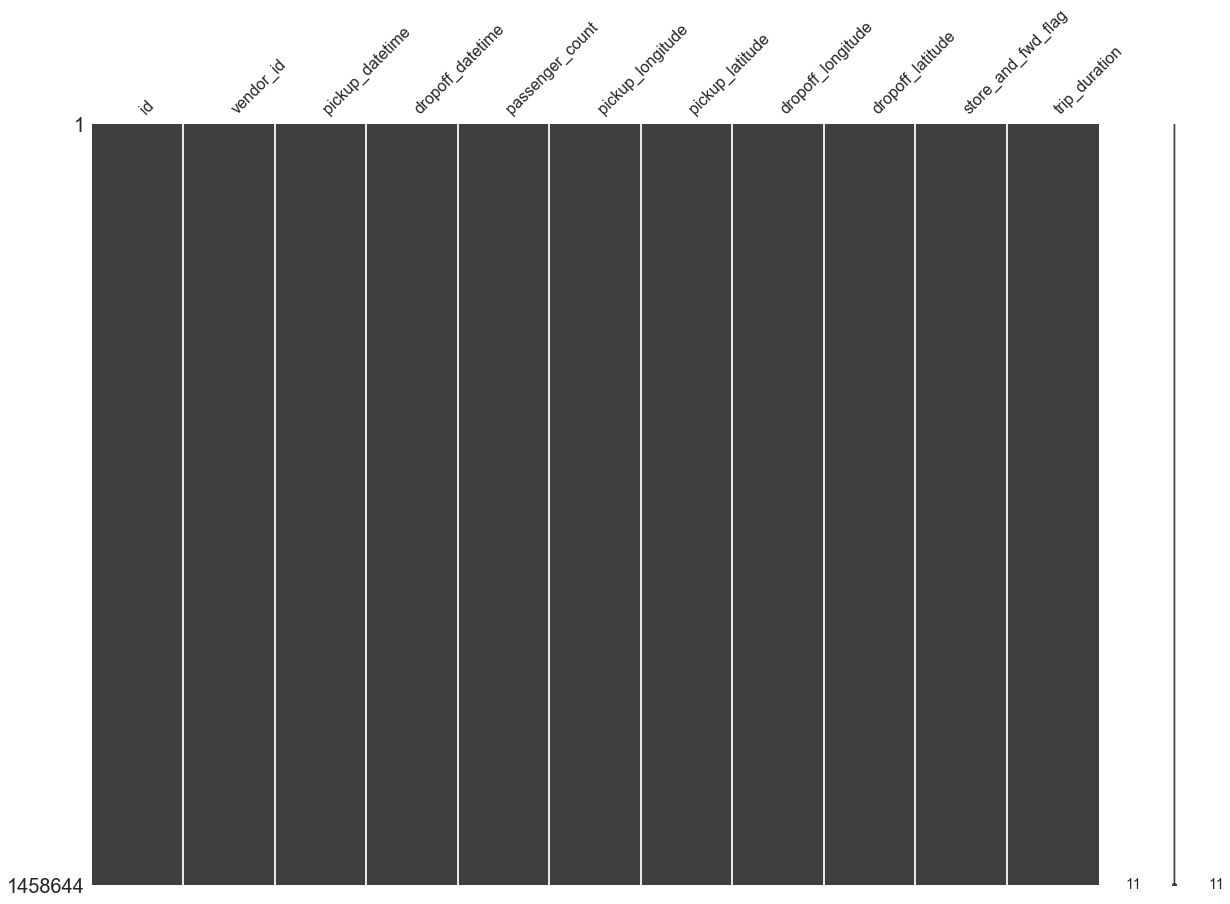

In [16]:
msno.matrix(df = train, figsize = (20, 14))

#### 데이터에 결측치는 없다

### 4) 상관관계 확인

#### 상관관계 매트릭스 가져오기
#### pandas 패키지의  corr() 함수 사용
#### heatmap : 다양한 정보를 일정 이미지 위에 열분포 형태의 비쥬얼한 그래픽으로 출력

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
cor_matrix = train.corr().round(2)

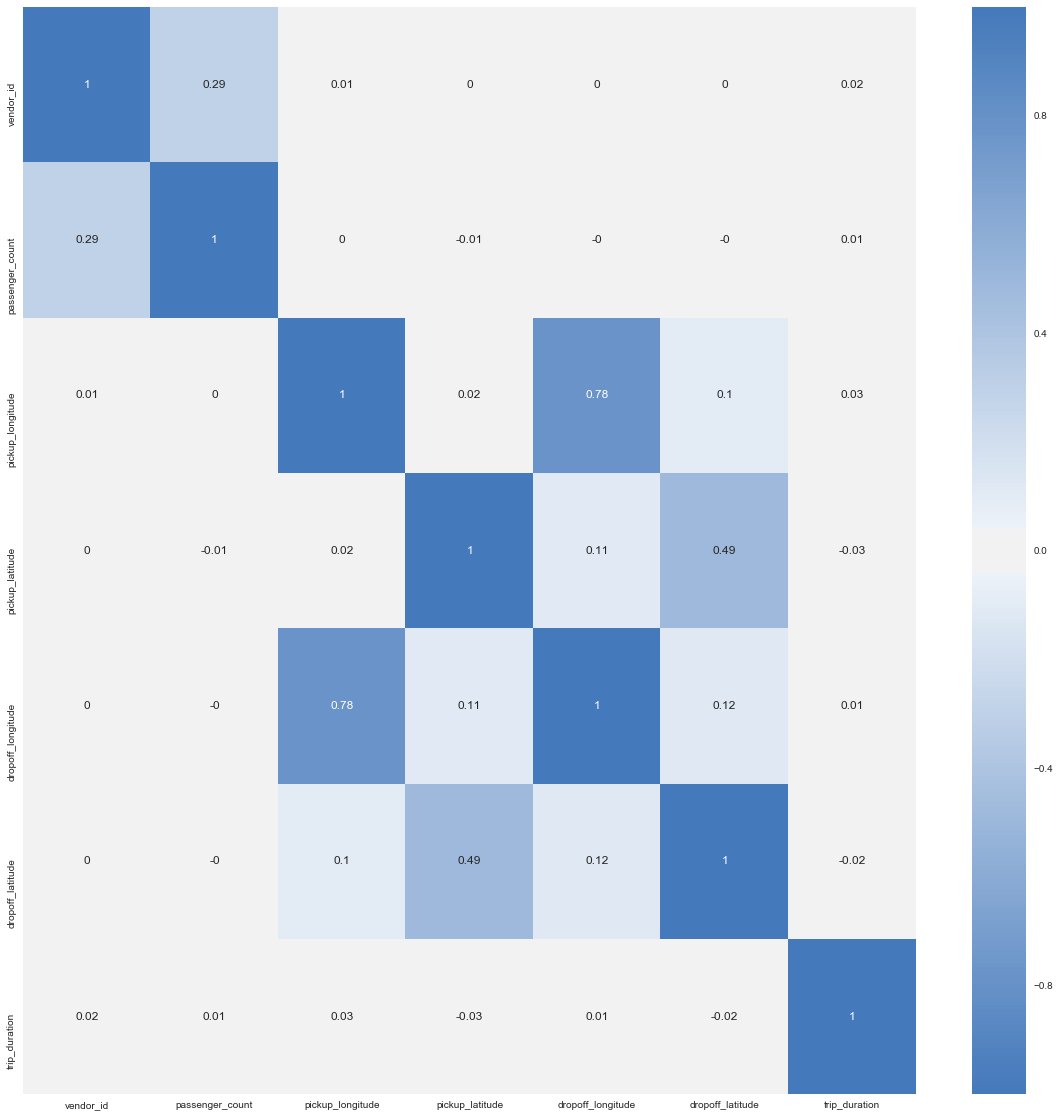

In [19]:
fig = plt.figure(figsize = (20, 20));
sns.heatmap(cor_matrix, annot = True, center = 0,
            cmap = sns.diverging_palette(250, 250, as_cmap = True),
            ax = plt.subplot(111));
plt.show()

#### 탑승 위치 경도와 하차 위치 경도가 0.78로 상관관계가 매우 높다
#### 탑승 위치 위도와 하차 위치 위도는 0.49의 상관관계를 갖는다.
#### 여행기록 코드와 탑승 승객 수가 0.29의 상관관계를 갖는다.
#### 그러나 목표값인 'trip_duration'과 큰 상관관계가 있는 변수는 보이지 않는다. 

####  
####  

## 3 데이터 변환

### 1) 파생변수 만들기 : 'pickup_datetime', 'dropoff_datetime' - 연,월,일,시,분,초, 요일 나누기

In [17]:
train['pickup_datetime'].head()

0   2016-03-14 17:24:55
1   2016-06-12 00:43:35
2   2016-01-19 11:35:24
3   2016-04-06 19:32:31
4   2016-03-26 13:30:55
Name: pickup_datetime, dtype: datetime64[ns]

In [18]:
train['dropoff_datetime'].head()

0   2016-03-14 17:32:30
1   2016-06-12 00:54:38
2   2016-01-19 12:10:48
3   2016-04-06 19:39:40
4   2016-03-26 13:38:10
Name: dropoff_datetime, dtype: datetime64[ns]

#### 'pickup_datetime'

In [20]:
train['pickup_year'] = train['pickup_datetime'].dt.year  
train['pickup_month'] = train['pickup_datetime'].dt.month
train['pickup_day'] = train['pickup_datetime'].dt.day
train['pickup_hour'] = train['pickup_datetime'].dt.hour
train['pickup_minute'] = train['pickup_datetime'].dt.minute
train['pickup_second'] = train['pickup_datetime'].dt.second
train["pickup_dayofweek"] = train["pickup_datetime"].dt.dayofweek 

train[['pickup_year','pickup_month', 'pickup_day','pickup_hour','pickup_minute','pickup_second', 'pickup_dayofweek']].head()

,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_dayofweek
0,2016,3,14,17,24,55,0
1,2016,6,12,0,43,35,6
2,2016,1,19,11,35,24,1
3,2016,4,6,19,32,31,2
4,2016,3,26,13,30,55,5


In [21]:
pd.unique(train['pickup_year'])

array([2016], dtype=int64)

In [23]:
pd.unique(train['pickup_month'])`

array([3, 6, 1, 4, 5, 2], dtype=int64)

In [24]:
test['pickup_year'] = test['pickup_datetime'].dt.year  
test['pickup_month'] = test['pickup_datetime'].dt.month
test['pickup_day'] = test['pickup_datetime'].dt.day
test['pickup_hour'] = test['pickup_datetime'].dt.hour
test['pickup_minute'] = test['pickup_datetime'].dt.minute
test['pickup_second'] = test['pickup_datetime'].dt.second
test["pickup_dayofweek"] = test["pickup_datetime"].dt.dayofweek 

test[['pickup_year','pickup_month', 'pickup_day','pickup_hour','pickup_minute','pickup_second', 'pickup_dayofweek']].head()

,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_dayofweek
0,2016,6,30,23,59,58,3
1,2016,6,30,23,59,53,3
2,2016,6,30,23,59,47,3
3,2016,6,30,23,59,41,3
4,2016,6,30,23,59,33,3


#### 'dropoff_datetime' - test 데이터에는 없음

### 2) 원핫인코딩(One-hot encoding) 

#### (1) store_and_fwd_flag - Y(Yes)와 N(No)을 string으로 인식하기에 원핫인코딩이 필요

In [21]:
train['store_and_fwd_flag_Y'] = train['store_and_fwd_flag'] == 'Y'
train['store_and_fwd_flag_N'] = train['store_and_fwd_flag'] == 'N'

train[['store_and_fwd_flag', 'store_and_fwd_flag_Y', 'store_and_fwd_flag_N' ]].head()

,store_and_fwd_flag,store_and_fwd_flag_Y,store_and_fwd_flag_N
0,N,False,True
1,N,False,True
2,N,False,True
3,N,False,True
4,N,False,True


In [22]:
test['store_and_fwd_flag_Y'] = test['store_and_fwd_flag'] == 'Y'
test['store_and_fwd_flag_N'] = test['store_and_fwd_flag'] == 'N'

test[['store_and_fwd_flag', 'store_and_fwd_flag_Y', 'store_and_fwd_flag_N']].head()

,store_and_fwd_flag,store_and_fwd_flag_Y,store_and_fwd_flag_N
0,N,False,True
1,N,False,True
2,N,False,True
3,N,False,True
4,N,False,True


#### (2) vendor_id

In [23]:
train['vendor_1'] = train['vendor_id'] == 1
train['vendor_2'] = train['vendor_id'] == 2

train[['vendor_id', 'vendor_1', 'vendor_2']].head()

,vendor_id,vendor_1,vendor_2
0,2,False,True
1,1,True,False
2,2,False,True
3,2,False,True
4,2,False,True


In [24]:
test['vendor_1'] = test['vendor_id'] == 1
test['vendor_2'] = test['vendor_id'] == 2

test[['vendor_id', 'vendor_1', 'vendor_2']].head()

,vendor_id,vendor_1,vendor_2
0,1,True,False
1,1,True,False
2,1,True,False
3,2,False,True
4,1,True,False


#### (3) passenger_count

In [25]:
train['passenger_0'] = train['passenger_count'] == 0
train['passenger_1'] = train['passenger_count'] == 1
train['passenger_2'] = train['passenger_count'] == 2
train['passenger_3'] = train['passenger_count'] == 3
train['passenger_4'] = train['passenger_count'] == 4
train['passenger_5'] = train['passenger_count'] == 5
train['passenger_6'] = train['passenger_count'] == 6
train['passenger_7'] = train['passenger_count'] == 7
train['passenger_8'] = train['passenger_count'] == 8
train['passenger_9'] = train['passenger_count'] == 9

train[['passenger_count', 'passenger_0', 'passenger_1', 'passenger_2', 'passenger_3', 
       'passenger_4', 'passenger_5', 'passenger_6', 'passenger_7', 'passenger_8', 'passenger_9']].head()

,passenger_count,passenger_0,passenger_1,passenger_2,passenger_3,passenger_4,passenger_5,passenger_6,passenger_7,passenger_8,passenger_9
0,1,False,True,False,False,False,False,False,False,False,False
1,1,False,True,False,False,False,False,False,False,False,False
2,1,False,True,False,False,False,False,False,False,False,False
3,1,False,True,False,False,False,False,False,False,False,False
4,1,False,True,False,False,False,False,False,False,False,False


In [26]:
test['passenger_0'] = test['passenger_count'] == 0
test['passenger_1'] = test['passenger_count'] == 1
test['passenger_2'] = test['passenger_count'] == 2
test['passenger_3'] = test['passenger_count'] == 3
test['passenger_4'] = test['passenger_count'] == 4
test['passenger_5'] = test['passenger_count'] == 5
test['passenger_6'] = test['passenger_count'] == 6
test['passenger_7'] = test['passenger_count'] == 7
test['passenger_8'] = test['passenger_count'] == 8
test['passenger_9'] = test['passenger_count'] == 9

test[['passenger_0', 'passenger_1', 'passenger_2', 'passenger_3', 'passenger_4', 
       'passenger_5', 'passenger_6', 'passenger_7', 'passenger_8', 'passenger_9']].head()

,passenger_0,passenger_1,passenger_2,passenger_3,passenger_4,passenger_5,passenger_6,passenger_7,passenger_8,passenger_9
0,False,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False


## 4. 시각화